In [2]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from math import sin, exp
from random import random
import pandas as pd
import matplotlib.pyplot as plt

import alg

%matplotlib inline



## Данные для расчетов
Реальные данные: 
- фьючерс рубль-доллар 16.02.2022 (боковик)
- фьючерс рубль доллар 17.02.2022 (растущий)
- фьючерс рубль-доллар 14.02.2022
- фьючерс рубль-доллар 21.02.2022 ('дикий день')
- доллар-биткойн 03.09.2022
- доллар-биткойн 07.09.2022 
- доллар-биткойн 04.09.2022 ('птичка')

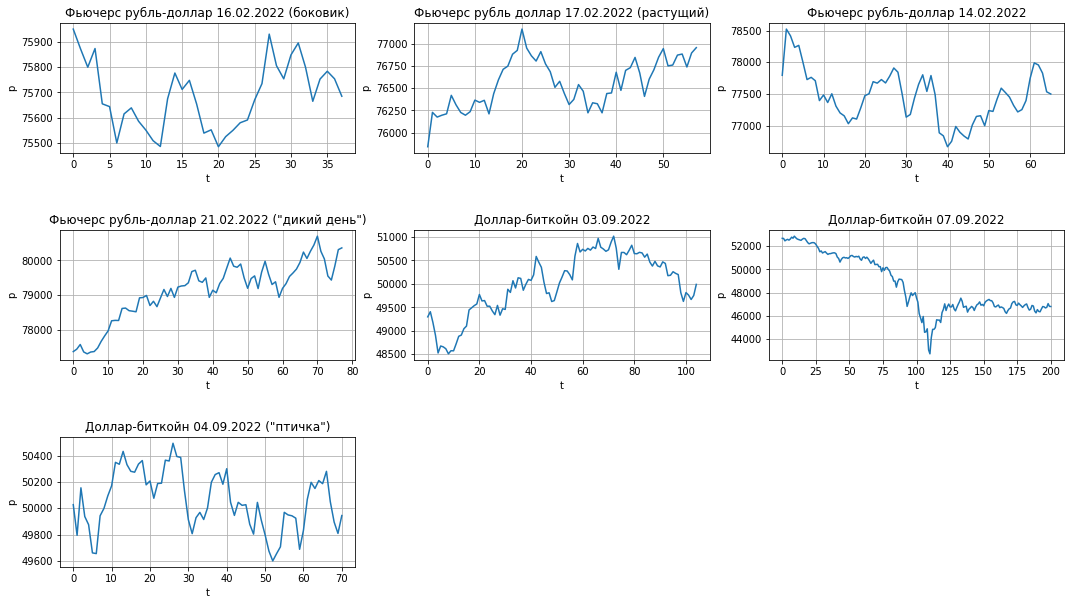

In [4]:
data_tpl = alg.load_test_data(step=18000)
p_arr_stable, p_arr_growth, p_arr_si_14, p_arr_si_21, p_arr_fall, p_arr_btc_07, p_arr_btc_04 = data_tpl
titles_lst = ['Фьючерс рубль-доллар 16.02.2022 (боковик)', 
              'Фьючерс рубль доллар 17.02.2022 (растущий)',
              'Фьючерс рубль-доллар 14.02.2022',
              'Фьючерс рубль-доллар 21.02.2022 ("дикий день")',
              'Доллар-биткойн 03.09.2022', 
              'Доллар-биткойн 07.09.2022',
              'Доллар-биткойн 04.09.2022 ("птичка")'] 

n_rows, n_cols = 3, 3
fig, ax = plt.subplots(figsize=(18, 10), nrows=n_rows, ncols=n_cols)
plt.subplots_adjust(wspace=.2, hspace=.6)
for i, data_arr in enumerate(data_tpl):
    n = i // n_cols
    m = i % n_cols
    ax[n][m].set_title(titles_lst[i])
    ax[n][m].set_xlabel("t") 
    ax[n][m].set_ylabel("p")
    ax[n][m].plot(data_arr)
    ax[n][m].grid()
        
# Убираем графики
ax[2][1].set_frame_on(False)
# Убираем оси
ax[2][1].axis('off')
ax[2][2].set_frame_on(False)
ax[2][2].axis('off')

plt.show()

## Тест гибридного алгоритма с разными параметрами

#### [True, False] x [-1., 1.] x [-1, 1] -> 2 x 51 x 51 = 5 202 алгоритмов

Заработано: 460.7654480226721 число переключений: 9


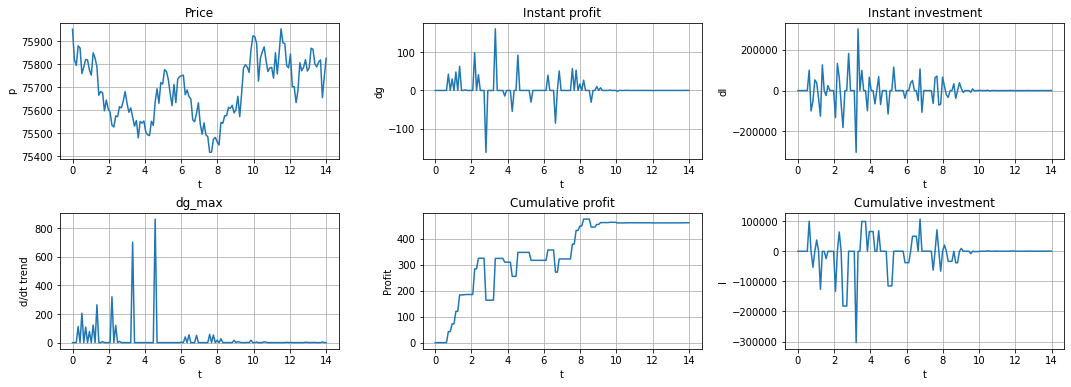

In [4]:
import numpy as np
import importlib
from itertools import product

importlib.reload(alg)

alg.visualize(*alg.calc_hybrid_alg(p_arr_stable,  time=14, output_flag=False))

Заработано: 744.4178675290335 число переключений: 12


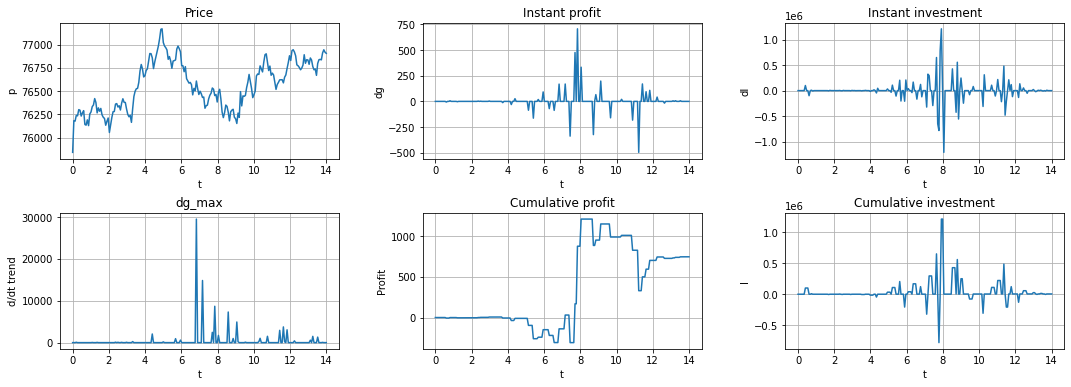

In [5]:
importlib.reload(alg)

alg.visualize(*alg.calc_hybrid_alg(p_arr_growth,  time=14, output_flag=False))

Заработано: 244229.15222300682 число переключений: 11


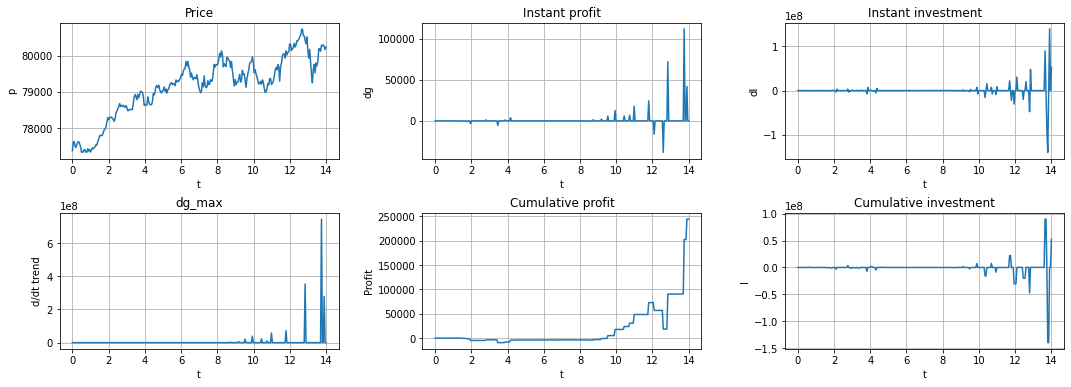

In [6]:
importlib.reload(alg)

alg.visualize(*alg.calc_hybrid_alg(p_arr_si_21,  time=14, output_flag=False))

#### [True, False] x [-1., 1.] x [-1, 1] -> 2 x 101 x 101 = 20 402 алгоритмов

Заработано: -102.09392310332373 число переключений: 4


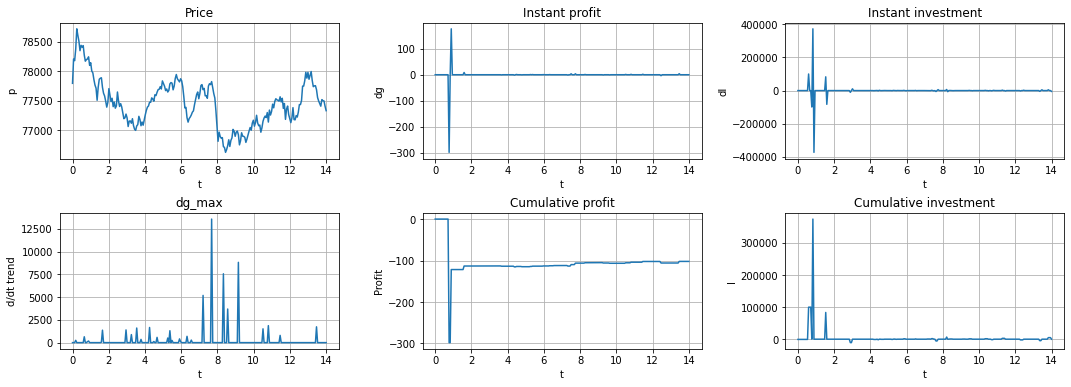

In [7]:
importlib.reload(alg)

alg.visualize(*alg.calc_hybrid_alg(p_arr_si_14,  time=14, output_flag=False))

Заработано: 2.4673374632071164e+16 число переключений: 22


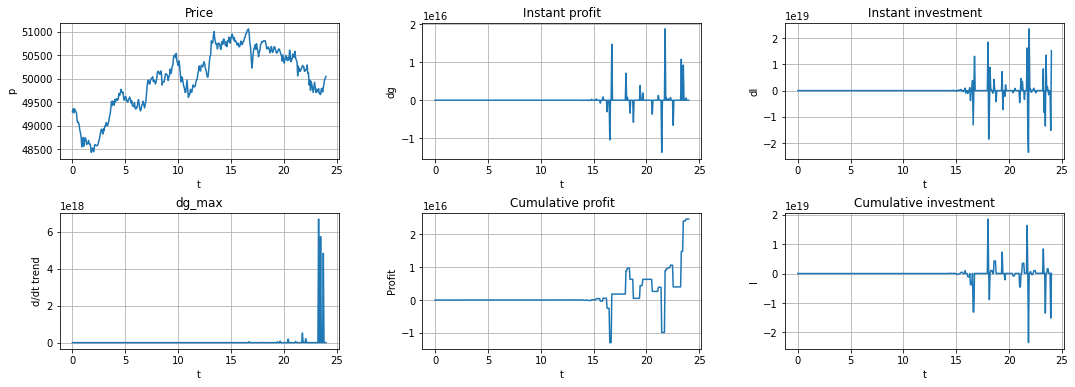

In [8]:
importlib.reload(alg)

alg.visualize(*alg.calc_hybrid_alg(p_arr_fall,  time=24, output_flag=False))

Заработано: 210621.27914169247 число переключений: 3


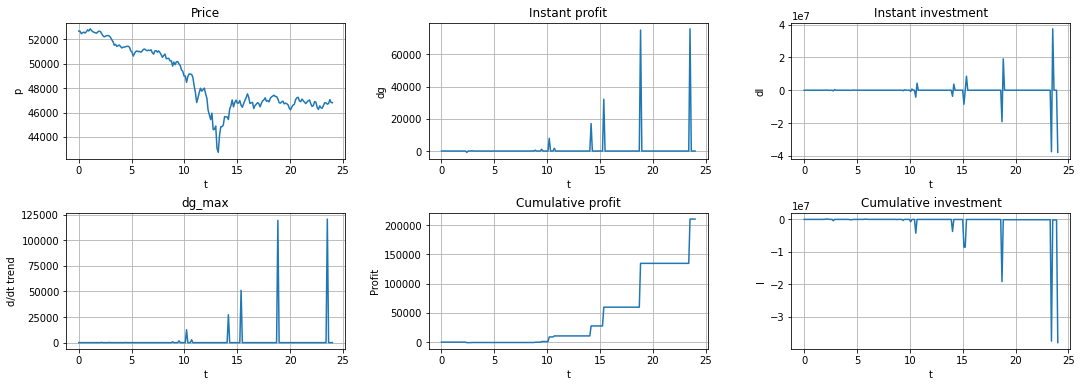

In [9]:
import importlib

importlib.reload(alg)

alg.visualize(*alg.calc_hybrid_alg(p_arr_btc_07,  time=24, output_flag=False, n_const=2000))

Заработано: 16.558501905432433 число переключений: 18


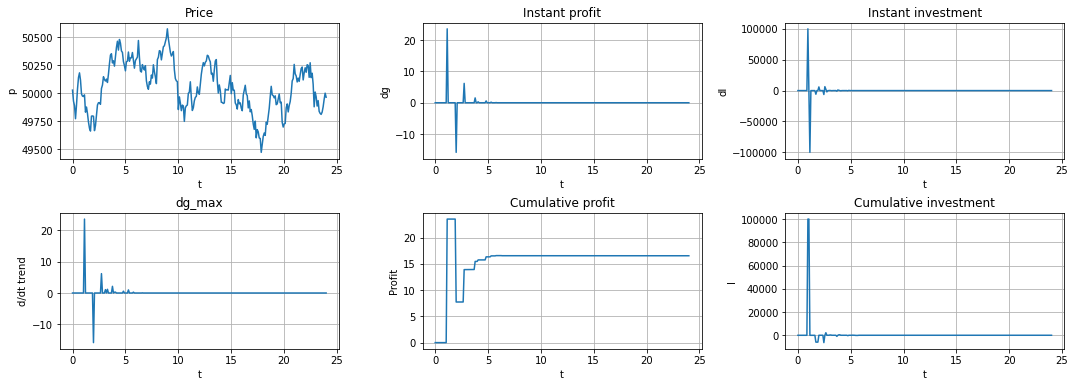

In [14]:
importlib.reload(alg)

alg.visualize(*alg.calc_hybrid_alg(p_arr_btc_04,  time=24, output_flag=False))

Заработано: 16.558501905432433 число переключений: 18


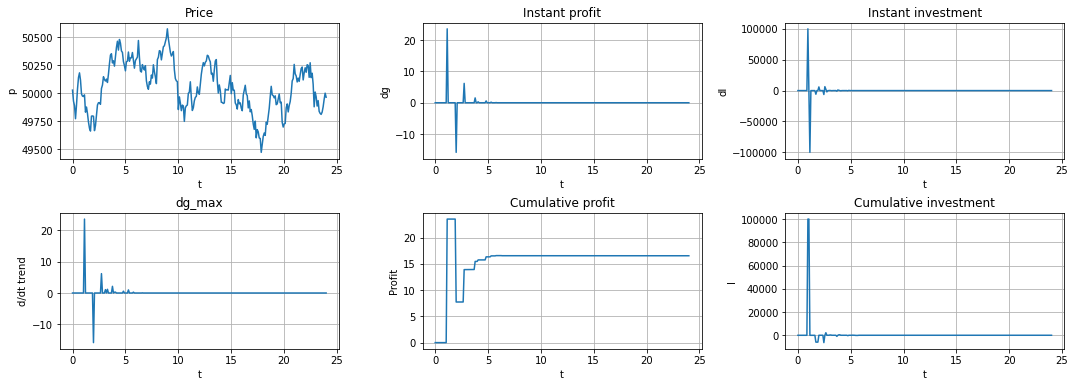

In [15]:
importlib.reload(alg)

alg.visualize(*alg.calc_hybrid_alg(p_arr_btc_04,  time=24, output_flag=False))

Заработано: 80.29961464375948 число переключений: 7
Заработано: 92.88939659658355 число переключений: 9
Заработано: 108.4205195635066 число переключений: 5
Заработано: 103.00103054841915 число переключений: 8
Заработано: 122.62142241977195 число переключений: 7
Заработано: 146.3267556262346 число переключений: 7
Заработано: 172.4293741091324 число переключений: 4
Заработано: 234.40045004080798 число переключений: 8
Заработано: 308.8535220746243 число переключений: 8
Заработано: 460.7569312579916 число переключений: 9
Заработано: 110.55703159582752 число переключений: 5


[]

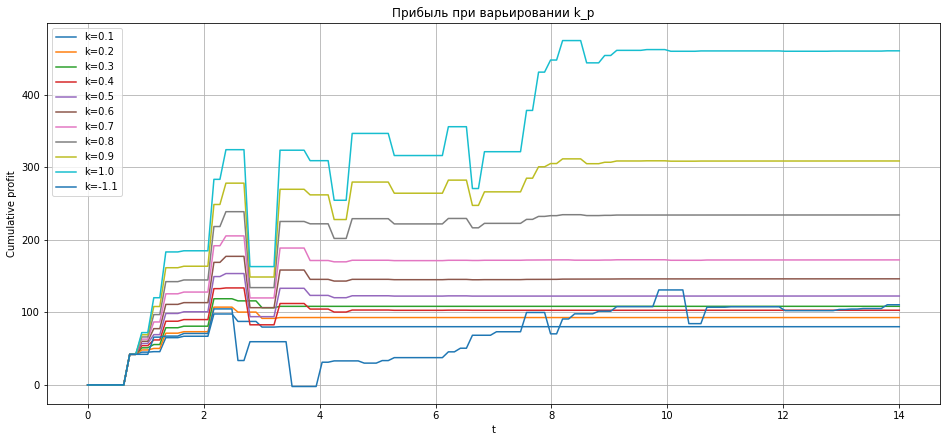

In [20]:
import importlib

importlib.reload(alg)

data_lst = []

fig, ax = plt.subplots(figsize=(16, 7))
ax.set_title('Прибыль при варьировании k_p')
ax.set_xlabel('t')
ax.set_ylabel('Cumulative profit')
ax.grid()
legend_lst = []

for k_p in [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1., -1.1]:
    res_tpl = alg.calc_hybrid_alg(p_arr_stable, output_flag=False, k_p=k_p)
    ax.plot(res_tpl[4])
    legend_lst.append(f'k={k_p}')

ax.legend(legend_lst)
plt.plot()
     





Заработано: 58.86508462852349 число переключений: 8
Заработано: 84.82009963767558 число переключений: 6
Заработано: 124.97092832106205 число переключений: 7
Заработано: 460.7569312579916 число переключений: 9
Заработано: 2399.407926259446 число переключений: 9
Заработано: 972.4221948234024 число переключений: 7
Заработано: 6559.590205328234 число переключений: 8


[]

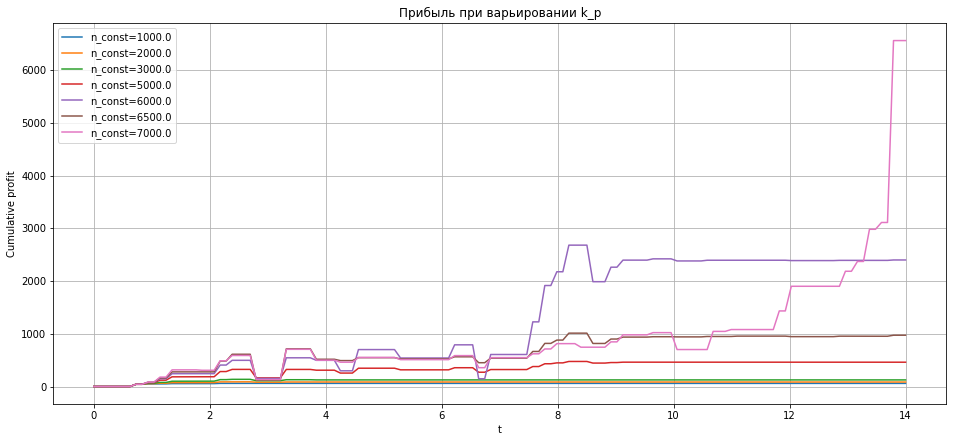

In [28]:
importlib.reload(alg)

fig, ax = plt.subplots(figsize=(16, 7))
ax.set_title('Прибыль при варьировании k_p')
ax.set_xlabel('t')
ax.set_ylabel('Cumulative profit')
ax.grid()
legend_lst = []

for n_const in [1000., 2000., 3000., 5000., 6000., 6500., 7000.]:
    res_tpl = alg.calc_hybrid_alg(p_arr_stable, output_flag=False, n_const=n_const)
    ax.plot(res_tpl[4])
    legend_lst.append(f'n_const={n_const}')

ax.legend(legend_lst)
plt.plot()

Заработано: -553.2313654102327 число переключений: 21
Заработано: -632.470807205557 число переключений: 20
Заработано: -1583.2776231439877 число переключений: 21
Заработано: -3361.965023373209 число переключений: 23
Заработано: -25285899.331653167 число переключений: 22
Заработано: -80824339.44448009 число переключений: 22
Заработано: -247229812.48307687 число переключений: 22


[]

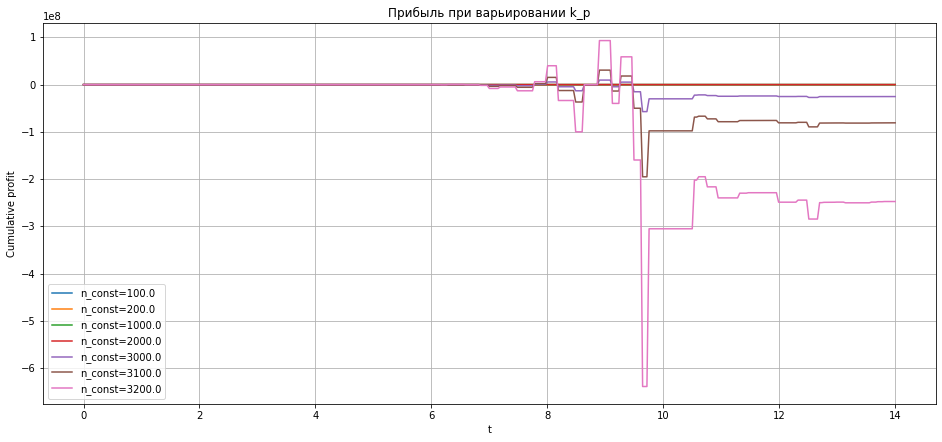

In [54]:
importlib.reload(alg)

fig, ax = plt.subplots(figsize=(16, 7))
ax.set_title('Прибыль при варьировании k_p')
ax.set_xlabel('t')
ax.set_ylabel('Cumulative profit')
ax.grid()
legend_lst = []

for n_const in [100., 200., 1000., 2000., 3000., 3100., 3200.]:
    res_tpl = alg.calc_hybrid_alg(p_arr_fall, output_flag=False, n_const=n_const)
    ax.plot(res_tpl[4])
    legend_lst.append(f'n_const={n_const}')

ax.legend(legend_lst)
plt.plot()

Заработано: 744.4178675290335 число переключений: 12


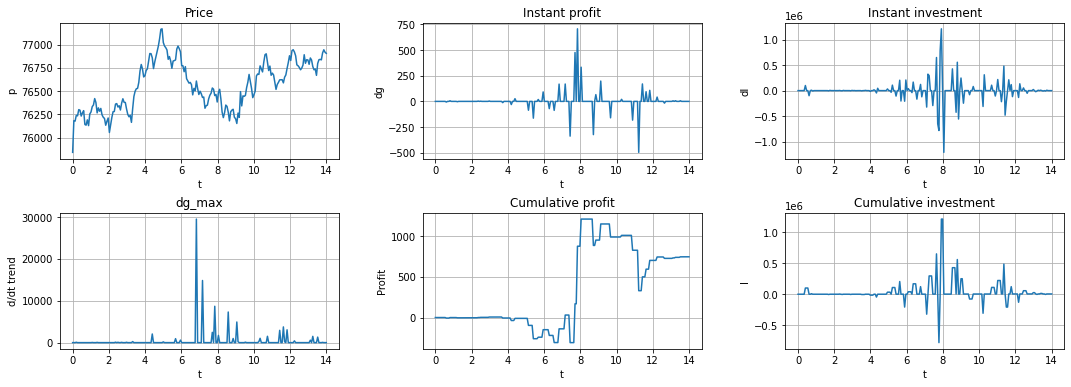

In [77]:
importlib.reload(alg)
alg.visualize(*alg.calc_hybrid_alg(p_arr_growth,  time=14, output_flag=False))

Заработано: -102.09392310332373 число переключений: 4


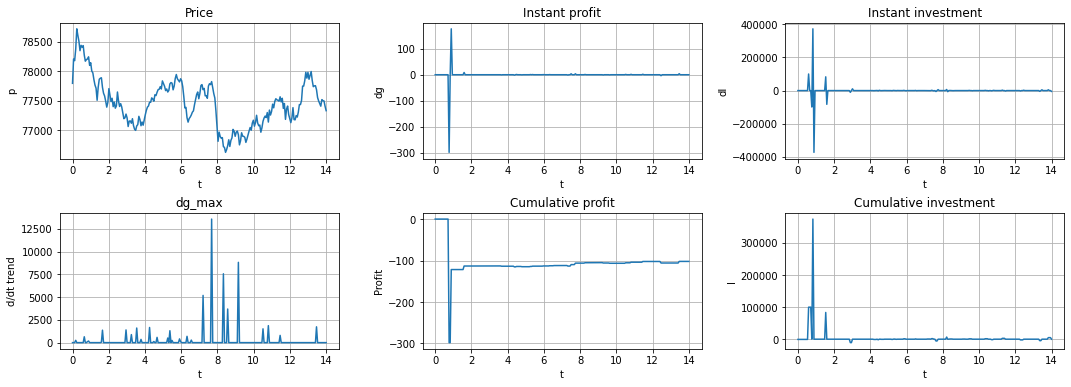

In [82]:
importlib.reload(alg)
alg.visualize(*alg.calc_hybrid_alg(p_arr_si_14, time=14, output_flag=False))

Заработано: 244229.15222300682 число переключений: 11


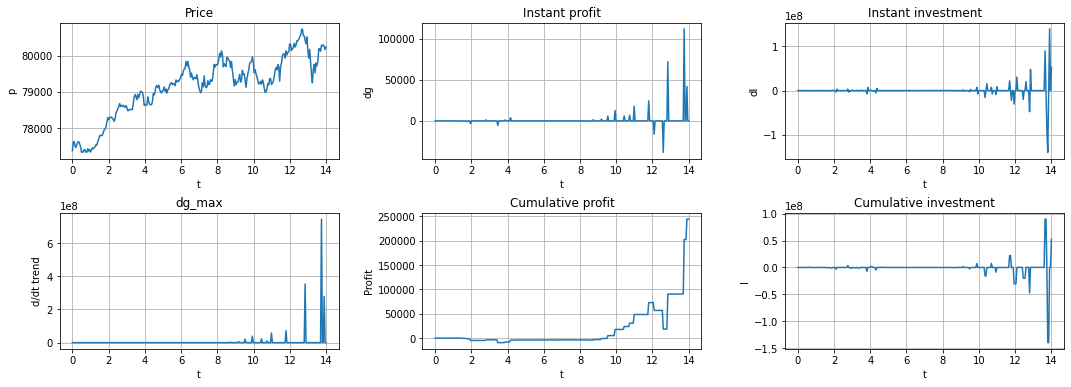

In [79]:
importlib.reload(alg)
alg.visualize(*alg.calc_hybrid_alg(p_arr_si_21, time=14, output_flag=False))

Заработано: 744.4178675290335 число переключений: 12


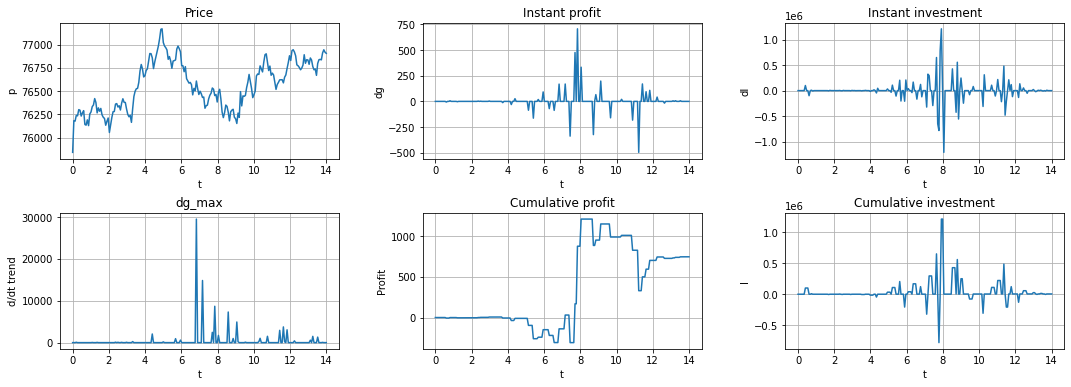

In [81]:
importlib.reload(alg)
alg.visualize(*alg.calc_hybrid_alg(p_arr_growth,  time=14, output_flag=False))

Заработано: -282.5261492228675 число переключений: 30


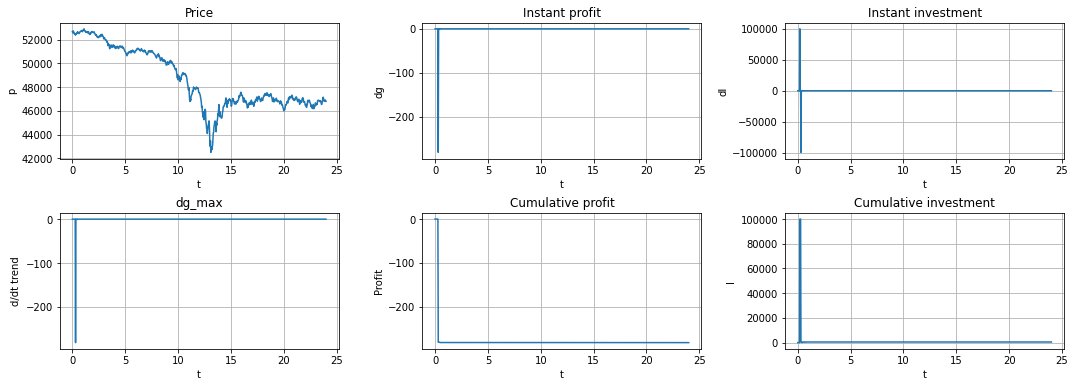

In [80]:
importlib.reload(alg)
alg.visualize(*alg.calc_hybrid_alg(p_arr_btc_07, time=24, output_flag=False, n_const=-5))

In [71]:
# importlib.reload(alg)
# alg.visualize(*alg.calc_hybrid_alg(p_arr_btc_04, time=24, output_flag=False))

Заработано: 0.005028344617372062 число переключений: 6
Заработано: 0.0038755076708608073 число переключений: 3
Заработано: -0.0064969209551657735 число переключений: 1
Заработано: 0.007705249402207604 число переключений: 2
Заработано: -0.01267016219688611 число переключений: 4
Заработано: -0.008718036602056382 число переключений: 4
Заработано: -0.007907451648414133 число переключений: 4


TypeError: 'Text' object is not callable

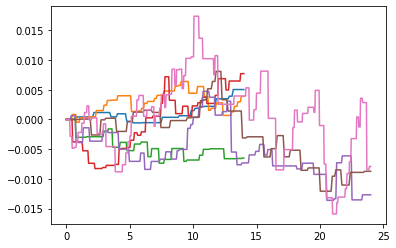

In [46]:
importlib.reload(alg)

profit_lst = []

for p in data_tpl[:4]:
    dg_sum = alg.calc_hybrid_alg(p, time=14, output_flag=False)[4]
    profit_lst.append(dg_sum)
for p in data_tpl[4:]:
    dg_sum = alg.calc_hybrid_alg(p, time=24, output_flag=False)[4]
    profit_lst.append(dg_sum)

fig, ax = plt.subplots()  
for dg_sum in profit_lst:
    ax.plot(dg_sum)
ax.title('Прибыли на тестовых данных для 5202 алгоритмов')
ax.set_xlabel('t')
ax.set_ylabel('Cumulative profit')
ax.grid()
plt.show()






Заработано: -0.0064969209551657735 число переключений: 1


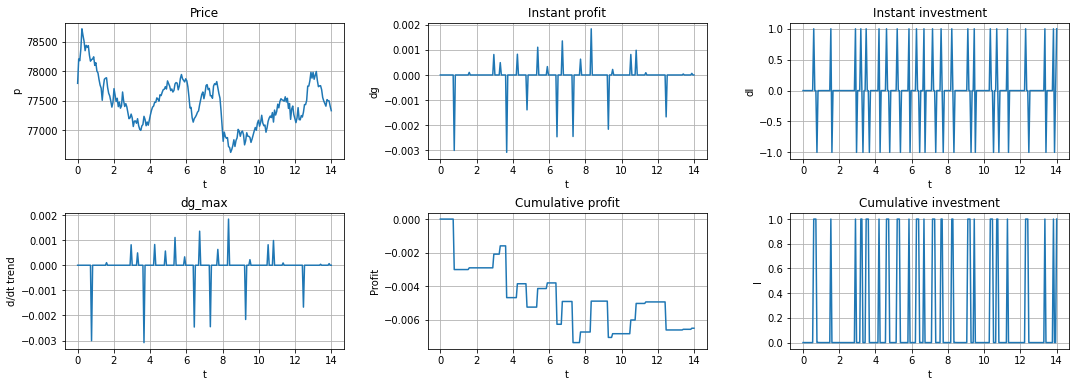

In [37]:
importlib.reload(alg)

alg.visualize(*alg.calc_hybrid_alg(p_arr_si_14, time=14, output_flag=False))

Заработано: 0.007705249402207604 число переключений: 2


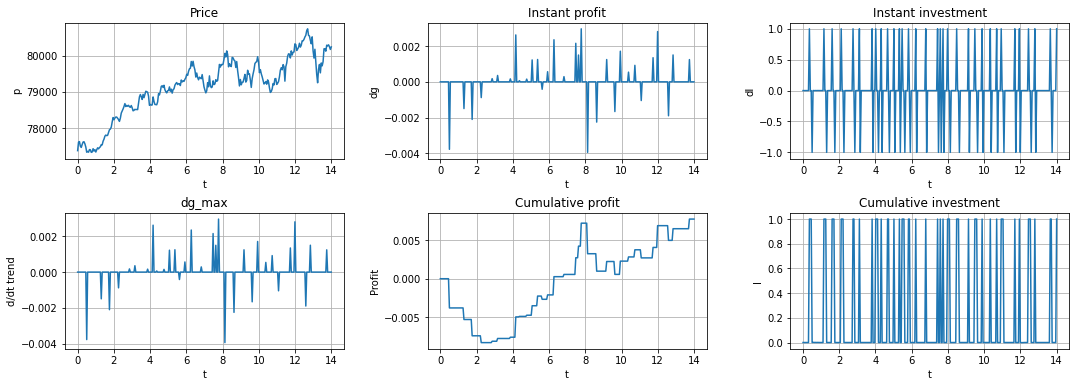

In [41]:
importlib.reload(alg)

alg.visualize(*alg.calc_hybrid_alg(p_arr_si_21, time=14, output_flag=False))

Заработано: -0.01267016219688611 число переключений: 4


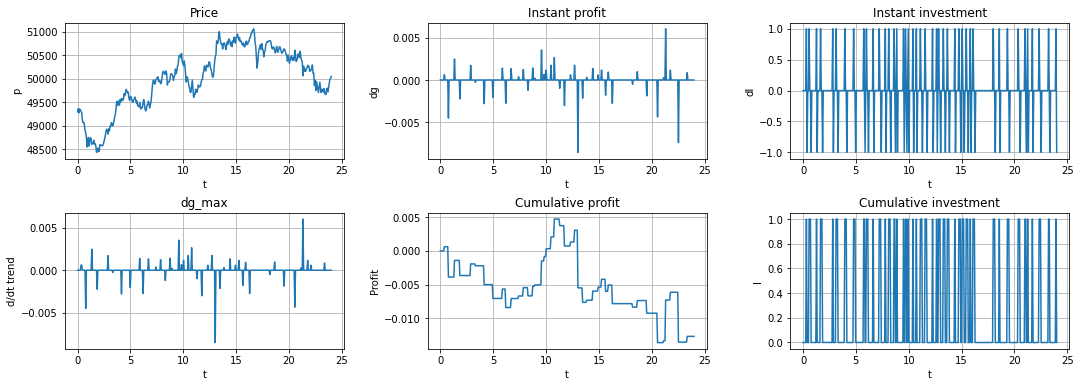

In [40]:
importlib.reload(alg)

alg.visualize(*alg.calc_hybrid_alg(p_arr_fall, time=24, output_flag=False))

Заработано: -0.008718036602056382 число переключений: 4


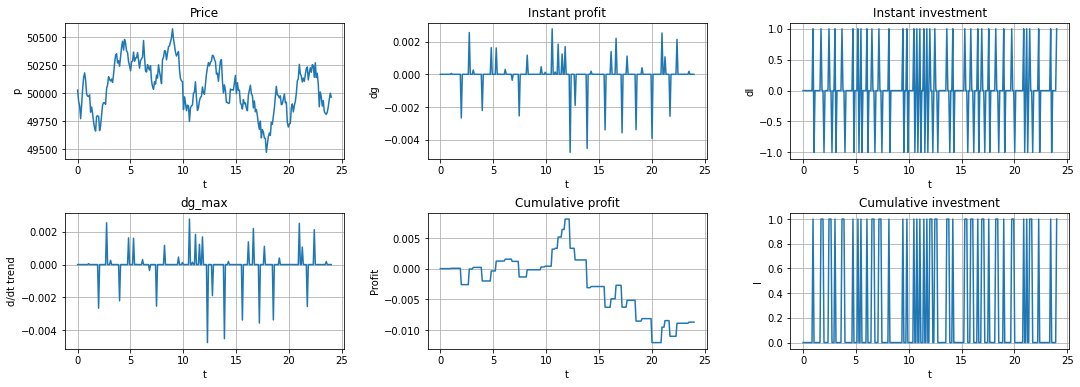

In [43]:
importlib.reload(alg)

alg.visualize(*alg.calc_hybrid_alg(p_arr_btc_07, time=24, output_flag=False))

Заработано: -0.007907451648414133 число переключений: 4


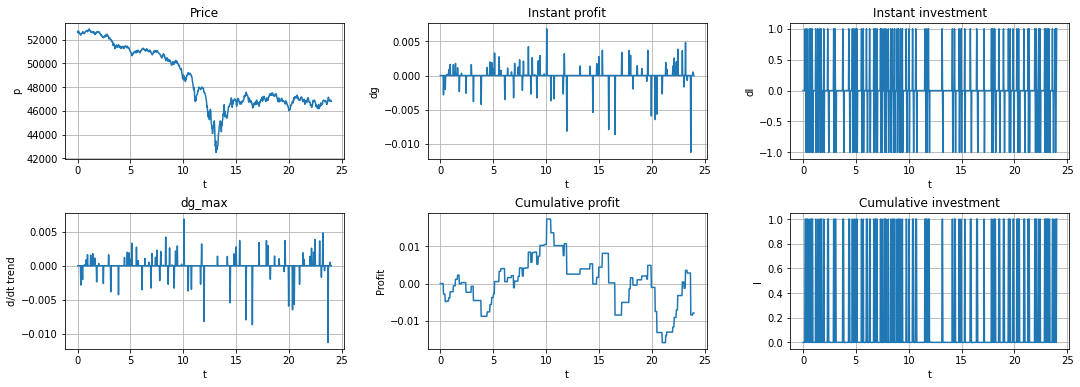

In [44]:
importlib.reload(alg)

alg.visualize(*alg.calc_hybrid_alg(p_arr_btc_04, time=24, output_flag=False))

## Тест алгоритма c переключением

iter=1, t=0.02 p=52582.59 diff=-101.39 ddiff=0.0 dtr=0.0 d2tr=0.0 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=2, t=0.04 p=52748.68 diff=166.09 ddiff=267.48 dtr=0.0 d2tr=0.0 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=3, t=0.06 p=52717.39 diff=-31.29 ddiff=-197.38 dtr=0.0 d2tr=0.0 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=4, t=0.08 p=52603.43 diff=-113.96 ddiff=-82.67 dtr=0.0 d2tr=0.0 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=5, t=0.1 p=52517.86 diff=-85.57 ddiff=28.39 dtr=0.0 d2tr=0.0 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=6, t=0.12 p=52536.28 diff=18.42 ddiff=103.99 dtr=-0.3679 d2tr=-0.0053 dI=0.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=7, t=0.14 p=52484.11 diff=-52.17 ddiff=-70.59 dtr=-0.4166 d2tr=-0.0007 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=8, t=0.16 p=52472.27 diff=-11.84 ddiff=40.33 dtr=-0.4226 d2tr=-0.0001 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=

iter=93, t=1.81 p=52029.48 diff=-77.0 ddiff=1.3 dtr=-0.2086 d2tr=-0.0007 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=94, t=1.83 p=51985.97 diff=-43.51 ddiff=33.49 dtr=-0.2564 d2tr=-0.0007 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=95, t=1.85 p=52005.61 diff=19.64 ddiff=63.15 dtr=-0.2826 d2tr=-0.0004 dI=0.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=96, t=1.87 p=51980.84 diff=-24.77 ddiff=-44.41 dtr=-0.3052 d2tr=-0.0003 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Open short
iter=97, t=1.89 p=51863.37 diff=-117.47 ddiff=-92.7 dtr=-0.3539 d2tr=-0.0007 dI=1.0 dg=117.46999999999389, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Close short
iter=98, t=1.91 p=51803.02 diff=-60.35 ddiff=57.12 dtr=-0.4042 d2tr=-0.0007 dI=34.1071 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=99, t=1.92 p=51852.78 diff=49.76 ddiff=110.11 dtr=-0.4195 d2tr=-0.0002 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=100, t=1.94 p=51755.58 diff=-97.2 ddiff=-

iter=173, t=3.36 p=51080.5 diff=4.79 ddiff=43.36 dtr=0.1786 d2tr=0.0002 dI=0.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=174, t=3.38 p=50986.03 diff=-94.47 ddiff=-99.26 dtr=0.1538 d2tr=-0.0004 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=175, t=3.4 p=51000.0 diff=13.97 ddiff=108.44 dtr=0.1349 d2tr=-0.0003 dI=0.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=176, t=3.42 p=50930.29 diff=-69.71 ddiff=-83.68 dtr=0.0946 d2tr=-0.0006 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=177, t=3.44 p=50892.62 diff=-37.67 ddiff=32.04 dtr=0.0482 d2tr=-0.0007 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=178, t=3.46 p=51024.66 diff=132.04 ddiff=169.71 dtr=0.0522 d2tr=0.0001 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=179, t=3.48 p=51056.48 diff=31.82 ddiff=-100.22 dtr=0.0643 d2tr=0.0002 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=180, t=3.5 p=51049.23 diff=-7.25 ddiff=-39.07 dtr=0.0703 d2tr=0.0001 dI=1.0

iter=250, t=4.86 p=50238.33 diff=-212.09 ddiff=-193.44 dtr=-0.3205 d2tr=-0.0013 dI=1.0 dg=212.0899999999965, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Close short
iter=251, t=4.88 p=50307.72 diff=69.39 ddiff=281.48 dtr=-0.3652 d2tr=-0.0006 dI=0.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=252, t=4.9 p=50432.69 diff=124.97 ddiff=55.58 dtr=-0.3529 d2tr=0.0002 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=253, t=4.92 p=50472.5 diff=39.81 ddiff=-85.16 dtr=-0.3224 d2tr=0.0004 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=254, t=4.94 p=50480.0 diff=7.5 ddiff=-32.31 dtr=-0.2885 d2tr=0.0005 dI=0.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=255, t=4.96 p=50413.91 diff=-66.09 ddiff=-73.59 dtr=-0.276 d2tr=0.0002 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=256, t=4.98 p=50199.28 diff=-214.63 ddiff=-148.54 dtr=-0.3284 d2tr=-0.0007 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=257, t=5.0 p=50343.31 diff=144.03 ddiff=358.66

iter=325, t=6.32 p=48743.16 diff=-141.79 ddiff=-43.59 dtr=0.0195 d2tr=-0.0015 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=326, t=6.34 p=48465.08 diff=-278.08 ddiff=-136.29 dtr=-0.1544 d2tr=-0.0025 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=327, t=6.36 p=48315.18 diff=-149.9 ddiff=128.18 dtr=-0.3378 d2tr=-0.0026 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=328, t=6.38 p=48104.64 diff=-210.54 ddiff=-60.64 dtr=-0.5441 d2tr=-0.0029 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=329, t=6.4 p=47815.01 diff=-289.63 ddiff=-79.09 dtr=-0.7894 d2tr=-0.0035 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=330, t=6.42 p=47772.68 diff=-42.33 ddiff=247.3 dtr=-0.9813 d2tr=-0.0027 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=331, t=6.44 p=47965.41 diff=192.73 ddiff=235.06 dtr=-1.0513 d2tr=-0.001 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=332, t=6.46 p=47316.57 diff=-648.84 ddiff=-841.57 dtr=-1

iter=403, t=7.84 p=44764.65 diff=49.6 ddiff=-475.21 dtr=0.2178 d2tr=0.0063 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=404, t=7.86 p=45103.53 diff=338.88 ddiff=289.28 dtr=0.6738 d2tr=0.0065 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=405, t=7.88 p=45149.97 diff=46.44 ddiff=-292.44 dtr=1.0382 d2tr=0.0052 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=406, t=7.89 p=45107.24 diff=-42.73 ddiff=-89.17 dtr=1.2926 d2tr=0.0036 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=407, t=7.91 p=44715.05 diff=-392.19 ddiff=-349.46 dtr=1.3418 d2tr=0.0007 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=408, t=7.93 p=44242.54 diff=-472.51 ddiff=-80.32 dtr=1.2003 d2tr=-0.002 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=409, t=7.95 p=44933.56 diff=691.02 ddiff=1163.53 dtr=1.281 d2tr=0.0012 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=410, t=7.97 p=44794.55 diff=-139.01 ddiff=-830.03 dtr=1.2725 d2tr=-0.

iter=483, t=9.39 p=47227.91 diff=-90.32 ddiff=-93.89 dtr=0.4949 d2tr=-0.0012 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=484, t=9.41 p=47072.6 diff=-155.31 ddiff=-64.99 dtr=0.3664 d2tr=-0.0018 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=485, t=9.43 p=46841.02 diff=-231.58 ddiff=-76.27 dtr=0.1816 d2tr=-0.0026 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=486, t=9.45 p=46740.28 diff=-100.74 ddiff=130.84 dtr=-0.0024 d2tr=-0.0026 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=487, t=9.47 p=47093.0 diff=352.72 ddiff=453.46 dtr=-0.0368 d2tr=-0.0005 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=488, t=9.49 p=47005.04 diff=-87.96 ddiff=-440.68 dtr=-0.0915 d2tr=-0.0008 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=489, t=9.51 p=46888.85 diff=-116.19 ddiff=-28.23 dtr=-0.1704 d2tr=-0.0011 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=490, t=9.53 p=46831.19 diff=-57.66 ddiff=58.53 dtr=-0.248

iter=563, t=10.95 p=47457.14 diff=67.14 ddiff=4.66 dtr=0.0618 d2tr=0.0003 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=564, t=10.97 p=47411.96 diff=-45.18 ddiff=-112.32 dtr=0.065 d2tr=0.0 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=565, t=10.99 p=47197.76 diff=-214.2 ddiff=-169.02 dtr=-0.0023 d2tr=-0.001 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=566, t=11.01 p=47152.34 diff=-45.42 ddiff=168.78 dtr=-0.0706 d2tr=-0.001 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=567, t=11.02 p=47009.5 diff=-142.84 ddiff=-97.42 dtr=-0.1692 d2tr=-0.0014 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=568, t=11.04 p=46804.63 diff=-204.87 ddiff=-62.03 dtr=-0.3097 d2tr=-0.002 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=569, t=11.06 p=46801.3 diff=-3.33 ddiff=201.54 dtr=-0.4161 d2tr=-0.0015 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Open short
iter=570, t=11.08 p=46998.43 diff=197.13 ddiff=200.46 dtr=-0.4

iter=632, t=12.29 p=47035.32 diff=154.64 ddiff=171.28 dtr=-0.0432 d2tr=-0.0002 dI=1.0 dg=-154.63999999999942, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Close short
iter=633, t=12.31 p=47023.69 diff=-11.63 ddiff=-166.27 dtr=-0.0545 d2tr=-0.0002 dI=0.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=634, t=12.33 p=47149.5 diff=125.81 ddiff=137.44 dtr=-0.0222 d2tr=0.0005 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=635, t=12.35 p=47149.19 diff=-0.31 ddiff=-126.12 dtr=0.0041 d2tr=0.0004 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Open short
iter=636, t=12.37 p=47182.59 diff=33.4 ddiff=33.71 dtr=0.0356 d2tr=0.0005 dI=1.0 dg=-33.39999999999418, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Close short
iter=637, t=12.39 p=47075.06 diff=-107.53 ddiff=-140.93 dtr=0.0257 d2tr=-0.0001 dI=-103.6583 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=638, t=12.41 p=46888.0 diff=-187.06 ddiff=-79.53 dtr=-0.0425 d2tr=-0.001 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=6

iter=707, t=13.75 p=46554.09 diff=-131.44 ddiff=-7.65 dtr=0.1691 d2tr=-0.0016 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=708, t=13.77 p=46548.9 diff=-5.19 ddiff=126.25 dtr=0.0761 d2tr=-0.0013 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Open short
iter=709, t=13.79 p=46721.7 diff=172.8 ddiff=177.99 dtr=0.0553 d2tr=-0.0003 dI=1.0 dg=-172.79999999999563, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Close short
iter=710, t=13.81 p=46823.78 diff=102.08 ddiff=-70.72 dtr=0.07 d2tr=0.0002 dI=57.8445 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=711, t=13.82 p=47079.68 diff=255.9 ddiff=153.82 dtr=0.1619 d2tr=0.0013 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=712, t=13.84 p=47154.5 diff=74.82 ddiff=-181.08 dtr=0.2556 d2tr=0.0013 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=713, t=13.86 p=47018.89 diff=-135.61 ddiff=-210.43 dtr=0.2815 d2tr=0.0004 dI=1.0 dg=0.0, dg_max=0.0 k=0.0 k_i=1.0 k_d=1.0 -> Hold
iter=714, t=13.88 p=46926.49 diff=-92.4

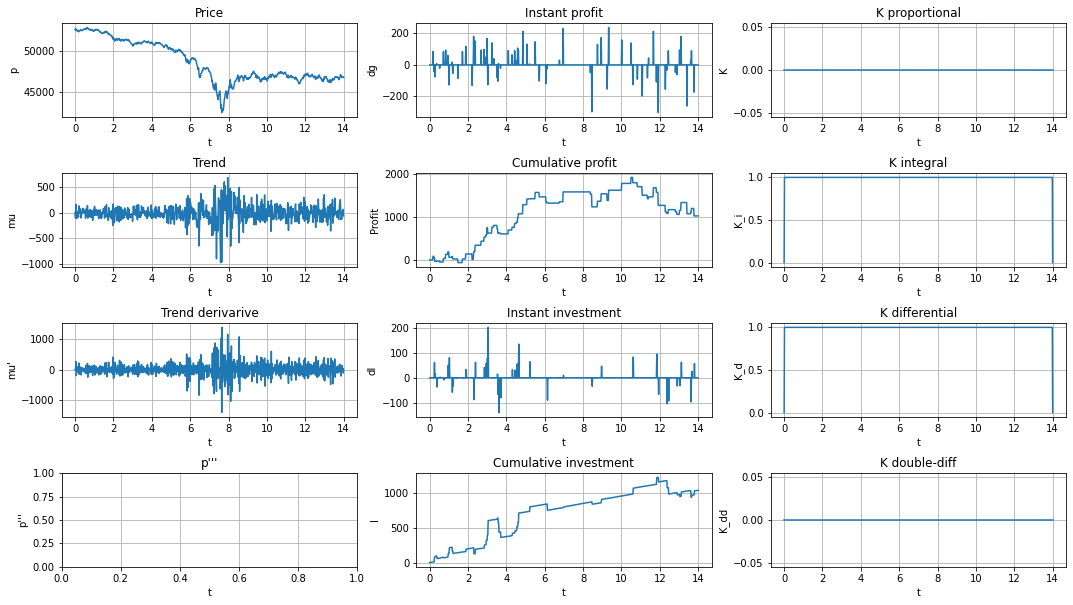

In [11]:
import importlib
import alg

importlib.reload(alg)

res_tpl = alg.calc_hybrid_alg(p_arr_btc_07)
alg.visualize(*res_tpl)

In [37]:
alg.visualize(*alg.calc_alg5(p_arr_si_17, output_flag=True))

NameError: name 'p_arr_si_17' is not defined

## Варьируем k_p (==1) и n_const (==5000)

NameError: name 'calc_alg1' is not defined

C:\Python310\lib\site-packages\scipy\optimize\_minimize.py:564: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,


iter=1 t=1.0 mu=41.3 k_cur_arr=[3.16216724 0.00539148] Kp=3.16217 Ki=0.0 I=1.0 g=413.0 -> Buy
iter=2 t=2.0 mu=-2.9 k_cur_arr=[-1.10032053  1.02531725] Kp=-1.10032 Ki=0.0 I=1306.97507 g=29.0 -> Sell
iter=3 t=3.0 mu=19.6 k_cur_arr=[3.16232268 0.01575938] Kp=3.16232 Ki=0.0 I=1275.06577 g=196.0 -> Buy
iter=4 t=4.0 mu=34.3 k_cur_arr=[ 3.16216626 -0.00758639] Kp=3.16217 Ki=0.0 I=1894.88102 g=343.0 -> Buy
iter=5 t=5.0 mu=-11.2 k_cur_arr=[-0.66355523  1.24396618] Kp=-0.66356 Ki=0.0 I=2979.50405 g=112.0 -> Sell
iter=6 t=6.0 mu=-9.8 k_cur_arr=[-0.6621695   1.24149225] Kp=-0.66217 Ki=0.0 I=2905.18586 g=98.0 -> Sell
iter=7 t=7.0 mu=-16.0 k_cur_arr=[-0.10812641  1.28095919] Kp=-0.10813 Ki=0.0 I=2840.29325 g=160.0 -> Sell
iter=8 t=8.0 mu=9.0 k_cur_arr=[3.16232114 0.00934343] Kp=3.16232 Ki=0.0 I=2822.99303 g=90.0 -> Buy
iter=9 t=9.0 mu=-3.2 k_cur_arr=[-1.10017992  1.01896863] Kp=-1.10018 Ki=0.0 I=3107.60193 g=32.0 -> Sell
iter=10 t=10.0 mu=2.7 k_cur_arr=[3.16159661 0.06862254] Kp=3.1616 Ki=0.0 I=3072

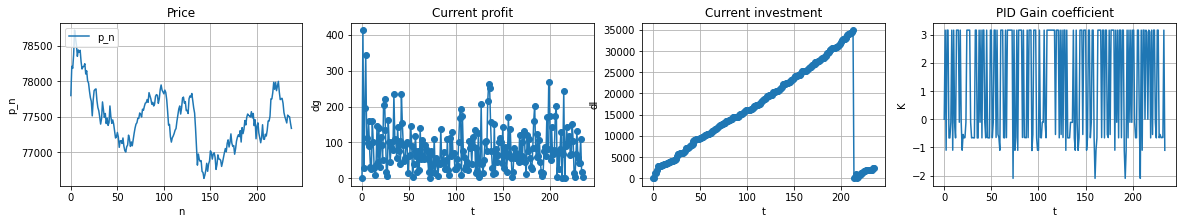

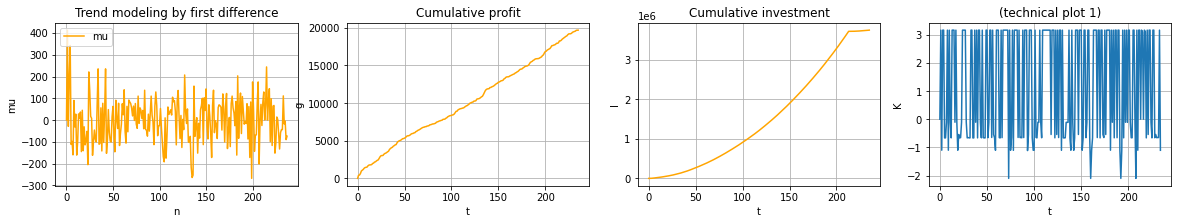

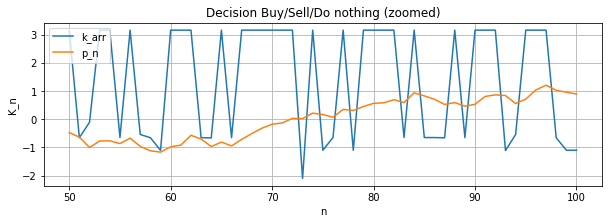

In [75]:
calc_alg1(p_arr_si_14, mu_arr_si_14, 1.) 

### Готово переключение алгоритмов, тестируем

Заработано: 868.0 число переключений: 3


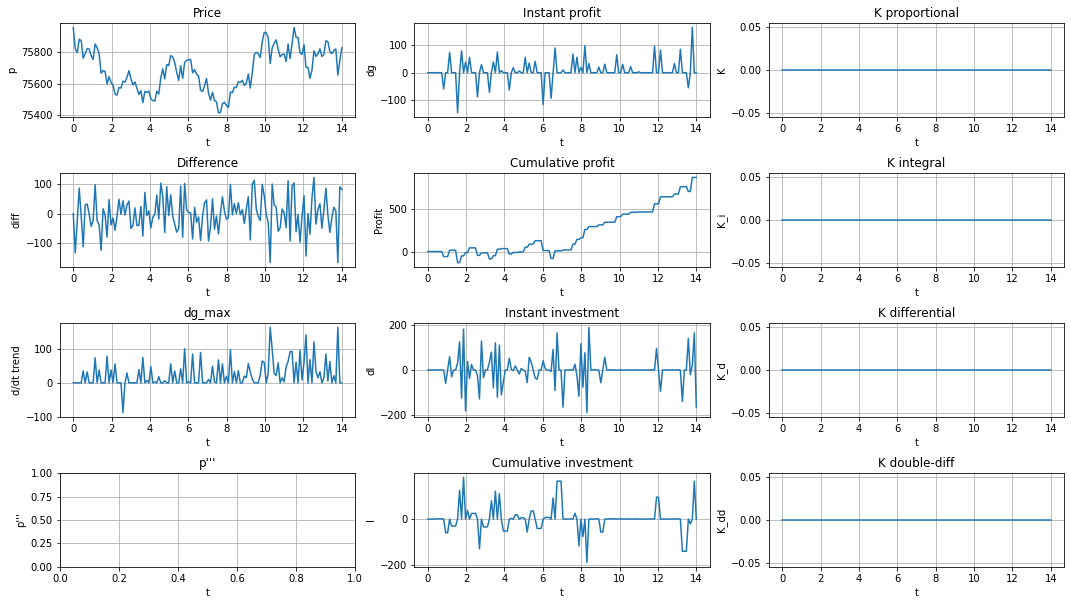

In [45]:
import alg
from math import fabs
import importlib

importlib.reload(alg)

alg.visualize(*alg.calc_hybrid_alg(p_arr_stable, output_flag=False))


In [46]:
alg.visualize(*alg.calc_hybrid_alg(p_arr_growth, output_flag=False))

ValueError: Какая-то неведомая хрень

Заработано: -0.0014344195662126448 число переключений: 13


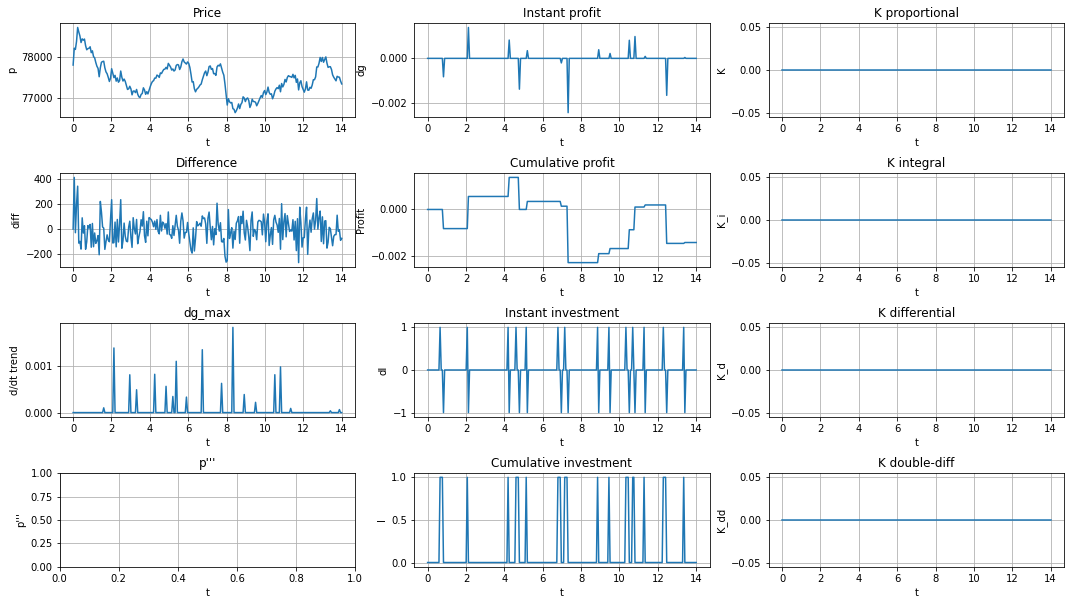

In [54]:
alg.visualize(*alg.calc_hybrid_alg(p_arr_si_14, output_flag=False))

Заработано: 1370.0 число переключений: 11


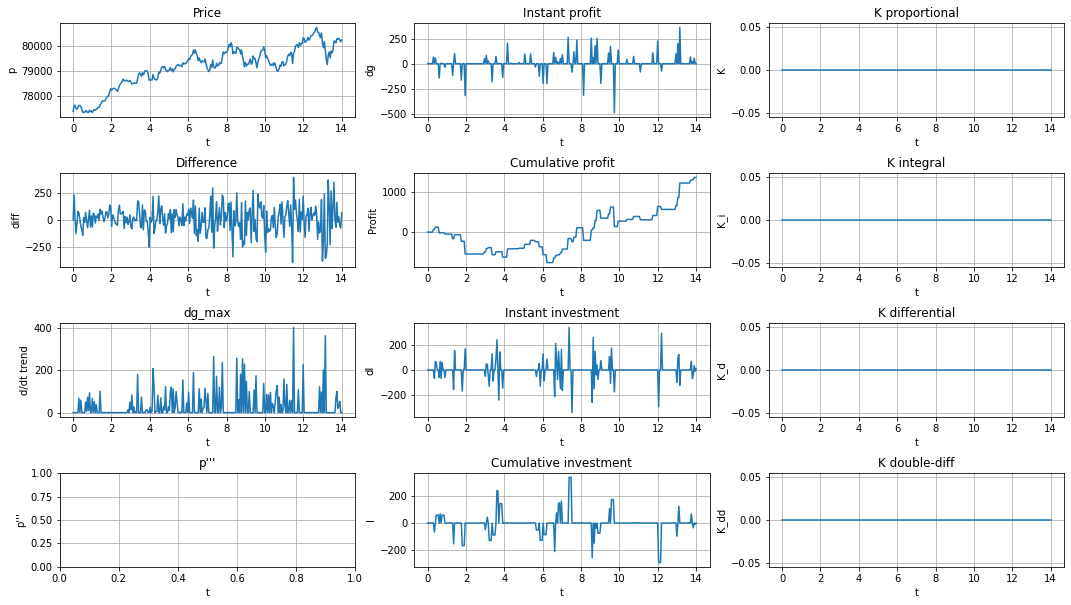

In [48]:
alg.visualize(*alg.calc_hybrid_alg(p_arr_si_21, output_flag=False))

Заработано: -1778.7699999999895 число переключений: 23


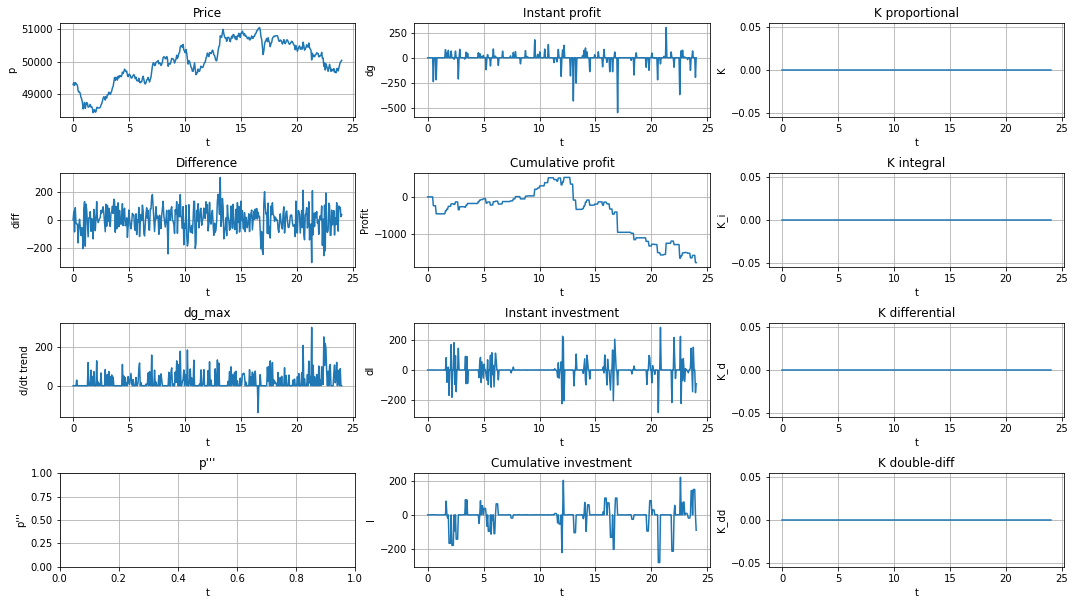

In [49]:
alg.visualize(*alg.calc_hybrid_alg(p_arr_fall, time=24, output_flag=False))

Заработано: -1342.6099999999497 число переключений: 23


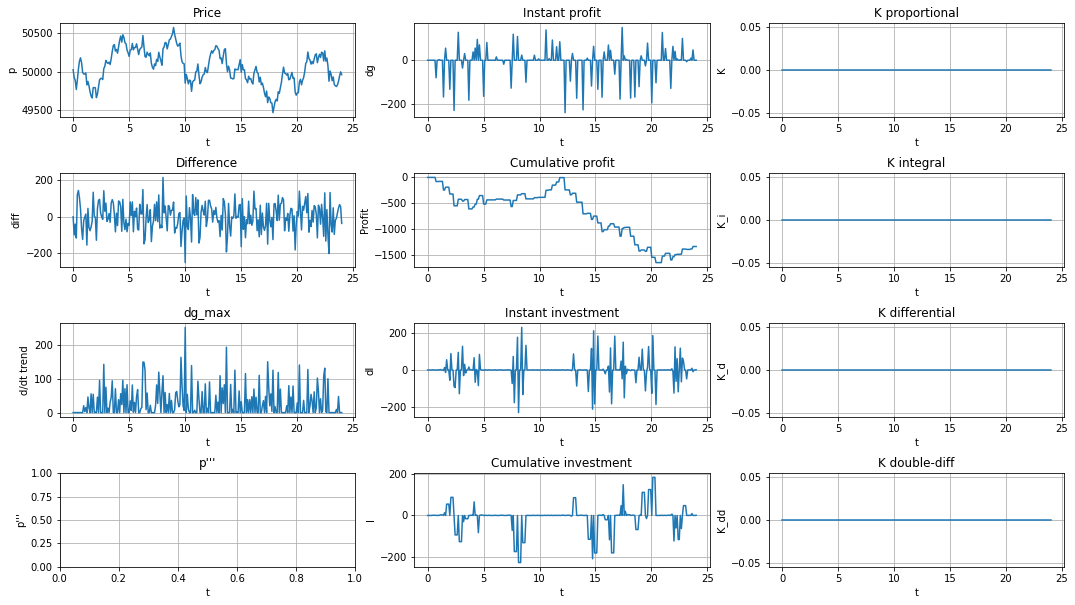

In [50]:
alg.visualize(*alg.calc_hybrid_alg(p_arr_btc_04, time=24, output_flag=False))

Заработано: -0.015531088188247073 число переключений: 47


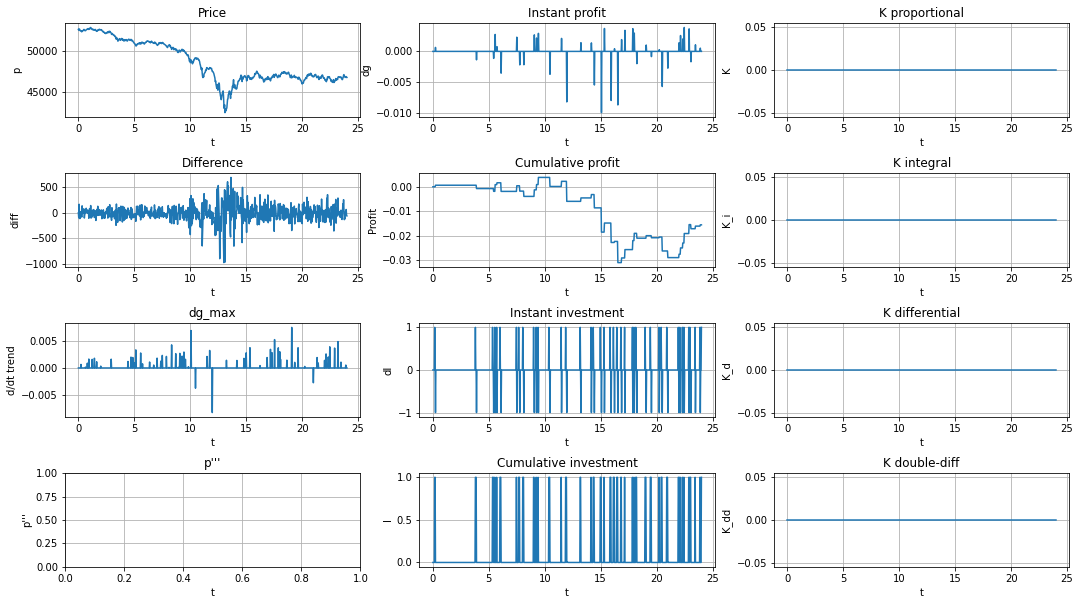

In [53]:
importlib.reload(alg)

alg.visualize(*alg.calc_hybrid_alg(p_arr_btc_07, time=24, output_flag=False))

(2, 0)